In [3]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import numpy as np
import ipywidgets as widgets
from IPython.display import display

In [4]:
# Paths to the files
tiff_files = [
    r"D:\Acres\January 2025\Assignment 9\East Singbhum\EastSingbhum\EastSingbhum_B2.tif",
    r"D:\Acres\January 2025\Assignment 9\East Singbhum\EastSingbhum\EastSingbhum_B3.tif",
    r"D:\Acres\January 2025\Assignment 9\East Singbhum\EastSingbhum\EastSingbhum_B4.tif",
    r"D:\Acres\January 2025\Assignment 9\East Singbhum\EastSingbhum\EastSingbhum_B8.tif",
    r"D:\Acres\January 2025\Assignment 9\East Singbhum\EastSingbhum\EastSingbhum_B8_contrast.tif",
    r"D:\Acres\January 2025\Assignment 9\East Singbhum\EastSingbhum\EastSingbhum_B8_corr.tif",
    r"D:\Acres\January 2025\Assignment 9\East Singbhum\EastSingbhum\EastSingbhum_B8_diss.tif",
    r"D:\Acres\January 2025\Assignment 9\East Singbhum\EastSingbhum\EastSingbhum_B8_var.tif",
    r"D:\Acres\January 2025\Assignment 9\East Singbhum\EastSingbhum\EastSingbhum_NDVI.tif",
    r"D:\Acres\January 2025\Assignment 9\East Singbhum\EastSingbhum\EastSingbhum_NDWI.tif",
    r"D:\Acres\January 2025\Assignment 9\East Singbhum\EastSingbhum\predicted.tif",
]

In [5]:
shapefile_path = r"D:\Acres\January 2025\Assignment 9\East Singbhum\EastSingbhumVillage.shp"

# Load the shapefile
villages = gpd.read_file(shapefile_path)

In [6]:
# Get the list of village names
village_names = villages["NAME"].unique()

In [7]:

# Function to plot the map
def plot_map(village_name, selected_tiff):
    plt.figure(figsize=(10, 10))

    # Plot the shapefile
    villages.boundary.plot(ax=plt.gca(), color="black")

    # Highlight the selected village
    if village_name:
        selected_village = villages[villages["NAME"] == village_name]
        selected_village.boundary.plot(ax=plt.gca(), color="red")

        # Zoom to the selected village
        xlim = [selected_village.total_bounds[0], selected_village.total_bounds[2]]
        ylim = [selected_village.total_bounds[1], selected_village.total_bounds[3]]
        plt.xlim(xlim)
        plt.ylim(ylim)

    # Overlay the selected TIFF layer
    if selected_tiff:
        with rasterio.open(selected_tiff) as src:
            band = src.read(1)  # Read the first band
            transform = src.transform

            # Mask the data using the shapefile bounds
            if village_name:
                mask_geom = selected_village.geometry.values
                mask = rasterio.features.geometry_mask(mask_geom, transform=transform, invert=True, out_shape=band.shape)
                band = np.where(mask, band, np.nan)

            plt.imshow(
                band,
                extent=(transform[2], transform[2] + transform[0] * band.shape[1], transform[5] + transform[4] * band.shape[0], transform[5]),
                cmap="viridis",
                alpha=0.7
            )

    plt.title(f"Dynamic Map View: {village_name}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid()
    plt.show()


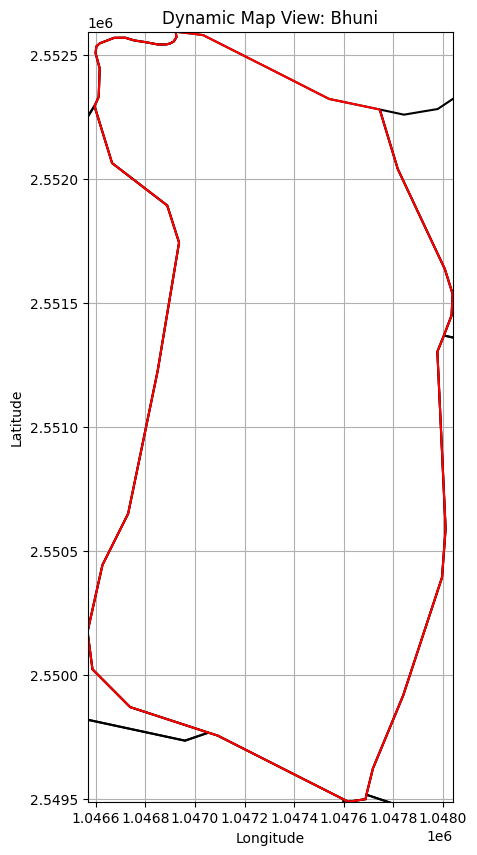

In [8]:
# Interactive widgets for village and TIFF selection
village_dropdown = widgets.Dropdown(
    options=[None] + list(village_names),
    value=None,
    description='Village:'
)

In [12]:
tiff_dropdown = widgets.Dropdown(
    options=[None] + tiff_files,
    value=None,
    description='TIFF Layer:'
)

In [13]:
# Function to update the map based on dropdown values
def update_map(change):
    plot_map(village_dropdown.value, tiff_dropdown.value)

# Attach the update function to dropdowns
village_dropdown.observe(update_map, names='value')
tiff_dropdown.observe(update_map, names='value')


In [11]:
# Display the widgets
display(village_dropdown, tiff_dropdown)

Dropdown(description='Village:', options=(None, 'Madhawpur', 'Rajhata', 'Dubrajpur Or Bandi', 'Chhota Chirka',…

Dropdown(description='TIFF Layer:', options=(None, 'D:\\Acres\\January 2025\\Assignment 9\\East Singbhum\\East…